In [1]:
import pandas as pd
import numpy as np
from numpy import random
import sklearn
from sklearn import metrics
import statsmodels.api as sm 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from random import randint

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_1 = pd.read_csv('Data/Data/BearCreek_precipitation_data.csv')
df_2 = pd.read_csv('Data/Data/BearCreek_McKee_flow.csv')
df_1 = df_1.set_index('date')
df_2 = df_2.set_index('date')

In [3]:
print(df_1)

            prdaily
date               
1-Jan-79   7.979798
2-Jan-79   7.550000
3-Jan-79   6.969231
4-Jan-79   8.455159
5-Jan-79   8.484074
...             ...
25-Feb-23  6.381481
26-Feb-23  6.837302
27-Feb-23  7.363248
28-Feb-23  7.976852
1-Mar-23   8.702020

[16131 rows x 1 columns]


In [4]:
print(df_2)

          Stage Height (feet) Streamflow (cubic feet per second)
date                                                            
1-Jan-02                  4.2                                692
2-Jan-02                  6.2                                956
3-Jan-02                  9.9                                NaN
4-Jan-02                  6.6                                977
5-Jan-02                  NaN                                NaN
...                       ...                                ...
24-Feb-23                 5.2                                 31
25-Feb-23                 9.6                                564
26-Feb-23                 9.1                                488
27-Feb-23                10.9                                792
28-Feb-23                10.7                                776

[7729 rows x 2 columns]


In [5]:
df_3 = df_1.join(df_2, lsuffix = '_df_1', rsuffix = '_df_2')


In [6]:
df_3.to_csv('Data/Data/BearCreek_precipitation_flow.csv')
print(df_3)

            prdaily Stage Height (feet) Streamflow (cubic feet per second)
date                                                                      
1-Jan-79   7.979798                 NaN                                NaN
2-Jan-79   7.550000                 NaN                                NaN
3-Jan-79   6.969231                 NaN                                NaN
4-Jan-79   8.455159                 NaN                                NaN
5-Jan-79   8.484074                 NaN                                NaN
...             ...                 ...                                ...
25-Feb-23  6.381481                 9.6                                564
26-Feb-23  6.837302                 9.1                                488
27-Feb-23  7.363248                10.9                                792
28-Feb-23  7.976852                10.7                                776
1-Mar-23   8.702020                 NaN                                NaN

[16131 rows x 3 columns]

In [7]:
df_3.columns

Index(['prdaily', 'Stage Height (feet)', 'Streamflow (cubic feet per second)'], dtype='object')

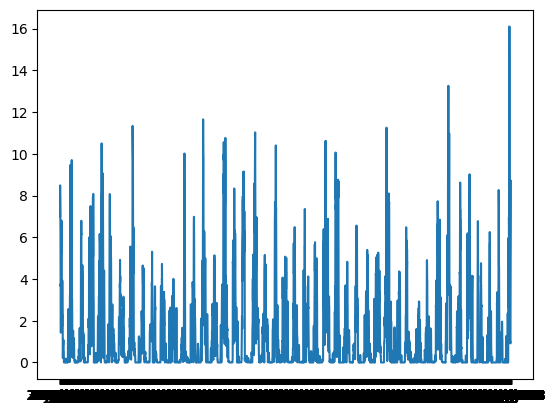

In [8]:
import matplotlib.pyplot as plt
plt.plot(df_3.index, df_3["prdaily"])

In [9]:
df_3 = df_3.fillna("", inplace=False)
df_3= df_3['1-Jan-02':]
df_3['prdaily'] = df_3['prdaily']
df_3['Stage Height (feet)'] = pd.to_numeric(df_3['Stage Height (feet)'], errors='coerce')
df_3['Stage Height (feet)']= df_3['Stage Height (feet)']
df_3['Streamflow (cubic feet per second)'] = pd.to_numeric(df_3['Streamflow (cubic feet per second)'],errors='coerce')
df_3['Streamflow (cubic feet per second)'] = df_3['Streamflow (cubic feet per second)']

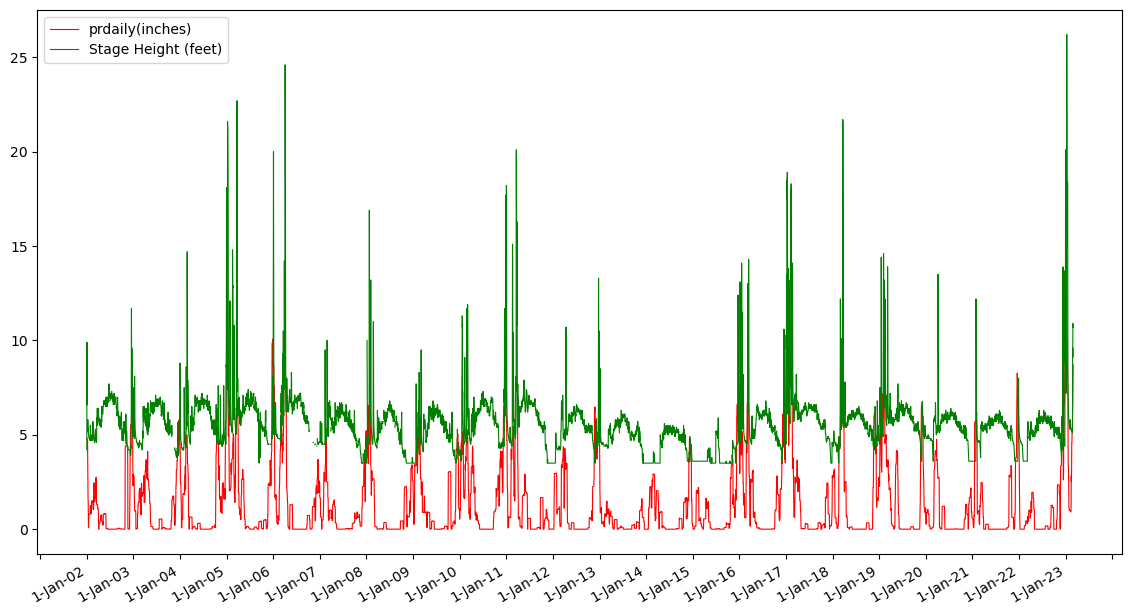

In [10]:
fig, ax = plt.subplots()
monthly_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(monthly_locator)
ax.plot(df_3.index, df_3['prdaily'].values, color = 'red', linewidth = 0.8, label = 'prdaily(inches)')
ax.plot(df_3.index, df_3['Stage Height (feet)'].values, color = 'green', linewidth = 0.8, label = 'Stage Height (feet)')
#ax.plot(df_3.index, df_3['Streamflow (cubic feet per second)'].values, color = 'black', linewidth = 0.8, label = 'Streamflow (cubic feet per second)')
#Then tick and format with matplotlib:

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

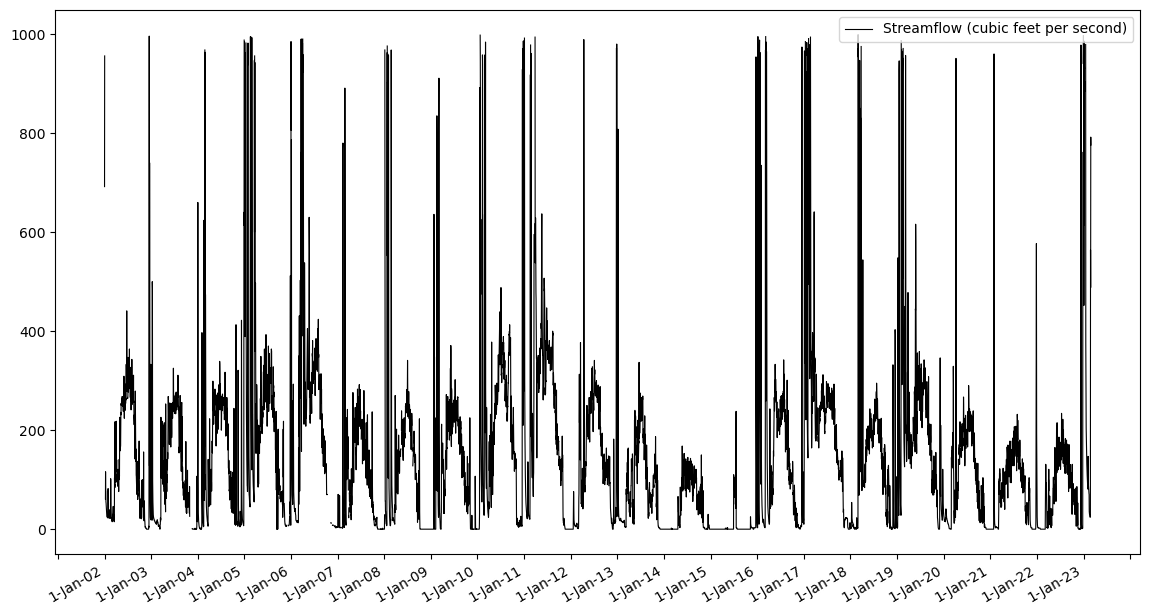

In [11]:
fig, ax = plt.subplots()
monthly_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(monthly_locator)
#ax.plot(df_3.index, df_3['prdaily'].values, color = 'red', linewidth = 0.8, label = 'prdaily')
#ax.plot(df_3.index, df_3['Stage Height (feet)'].values, color = 'green', linewidth = 0.8, label = 'Stage Height (feet)')
ax.plot(df_3.index, df_3['Streamflow (cubic feet per second)'].values, color = 'black', linewidth = 0.8, label = 'Streamflow (cubic feet per second)')
#Then tick and format with matplotlib:

fig.autofmt_xdate()
fig.set_size_inches(14, 8)
plt.legend()
plt.show()

In [12]:
from statistics import mean
from datetime import datetime
df_4 = pd.read_csv('Data/Data/BearCreek_precipitation_flow.csv')
df_4['date'] = df_4['date'].apply(lambda x: int(datetime.strptime(x, '%d-%b-%y').strftime('%Y%m%d'))).dropna()
df_4 = df_4.astype(float)
df_4= df_4[8401:].dropna()
X = df_4[['date','prdaily']].dropna()
y = df_4[['Streamflow (cubic feet per second)']].dropna()
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)

In [13]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.66)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
r_sq = model.score(X_valid, y_valid)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.07486759554327815


In [17]:
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Model score : ', model.score(X, y))

model intercept : [5121.38468678]
model coefficients :  [[-2.48473242e-04  1.67445186e+01]]
Model score :  0.04991109157021412


In [18]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)
X_v = sc_X.fit_transform(X_valid)
y_v = sc_y.fit_transform(y_valid)
X_t = sc_X.fit_transform(X_test)
y_t = sc_y.fit_transform(y_test)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_features=2,random_state = 100,min_samples_split=2) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_features=2, random_state=100)

In [20]:
r_sq = regressor.score(X_valid, y_valid)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.4676017422329889


In [21]:
cross_val_score(regressor, X_test, y_test, cv=10)

array([ 0.39089084, -0.6354041 , -0.25696397, -0.22598951,  0.09194285,
        0.22159913, -0.14881838, -0.29390376,  0.2318452 , -0.29343889])

In [22]:
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.4188471571547637


In [23]:
ypred = regressor.predict(X_test)

error = metrics.mean_squared_error(y_test, ypred)
print("MSE: ", error)
print("RMSE: ", error**(1/2.0)) 

MSE:  16130.647291154333
RMSE:  127.00648523266177


In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf',degree=3,C=1.7, epsilon=0.7,verbose=True)
regressor.fit(X,y)

C:\Users\renat\anaconda3\envs\py10\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVR(C=1.7, epsilon=0.7, verbose=True)

In [26]:
X_v = sc_X.fit_transform(X_valid)
y_v = sc_y.fit_transform(y_valid)
score = regressor.score(X_v, y_v)
print("R-squared:", score)

R-squared: 0.14154154173280586


In [27]:
X_t = sc_X.fit_transform(X_test)
y_t = sc_y.fit_transform(y_test)
score = regressor.score(X_t, y_t)
print("R-squared:", score)

R-squared: 0.12103762344671132


In [28]:
ypred = regressor.predict(X_t)

error = metrics.mean_squared_error(y_t, ypred)
print("MSE: ", error)
print("RMSE: ", error**(1/2.0))

MSE:  0.8789623765532889
RMSE:  0.9375299336838738


In [29]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [30]:
est = GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='squared_error')

In [31]:
est.fit(X_train, y_train)

C:\Users\renat\anaconda3\envs\py10\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [32]:
score = est.score(X_valid, y_valid)
print("R-squared:", score)

R-squared: 0.539999368570351


In [33]:
score = est.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.5531790999495472


In [61]:
df_test = pd.read_csv('Data/Data/BearCreek_precipitation_future.csv')
df_index =pd.read_csv('Data/Data/BearCreek_precipitation_future.csv')
df_index = df_index.set_index('Var1')
print(df_test)

              Var1  Var2_1    Var2_2    Var2_3    Var2_4     Var2_5    Var2_6  \
0      01-Jan-2030     0.0  0.000000  9.552571  0.000000   0.000000  8.627503   
1      02-Jan-2030     0.0  0.000000  6.277503  0.000000  17.238254  0.000000   
2      03-Jan-2030     0.0  7.915987  7.183960  0.000000   4.731141  0.000000   
3      04-Jan-2030     0.0  4.179442  1.503046  0.000000   0.000000  6.585368   
4      05-Jan-2030     0.0  0.829432  0.000000  0.000000   0.667076  0.268048   
...            ...     ...       ...       ...       ...        ...       ...   
25562  27-Dec-2099     0.0  0.687543  0.000000  0.000000   0.000000  1.907601   
25563  28-Dec-2099     0.0  7.429634  0.000000  0.000000   0.000000  0.000000   
25564  29-Dec-2099     0.0  2.822664  0.000000  0.000000   0.000000  0.000000   
25565  30-Dec-2099     0.0  0.000000  0.000000  0.000000   0.000000  0.000000   
25566  31-Dec-2099     0.0  1.374381  0.000000  1.127355   0.000000  0.000000   

         Var2_7     Var2_8 

In [62]:
df_test['Var1'] = df_test['Var1'].apply(lambda x: int(datetime.strptime(x, '%d-%b-%Y').strftime('%Y%m%d'))).dropna()
df_test = df_test.rename(columns={'Var1':'date'})
df_test = df_test.rename(columns={'Var2_3':'prdaily'})
X = df_test[['date','prdaily']].dropna()
df_test = df_test.astype(float)
ypred_test = est.predict(X)
print(ypred_test)

[546.2355276  499.94143113 732.32547871 ... 349.33675217 349.33675217
 349.33675217]


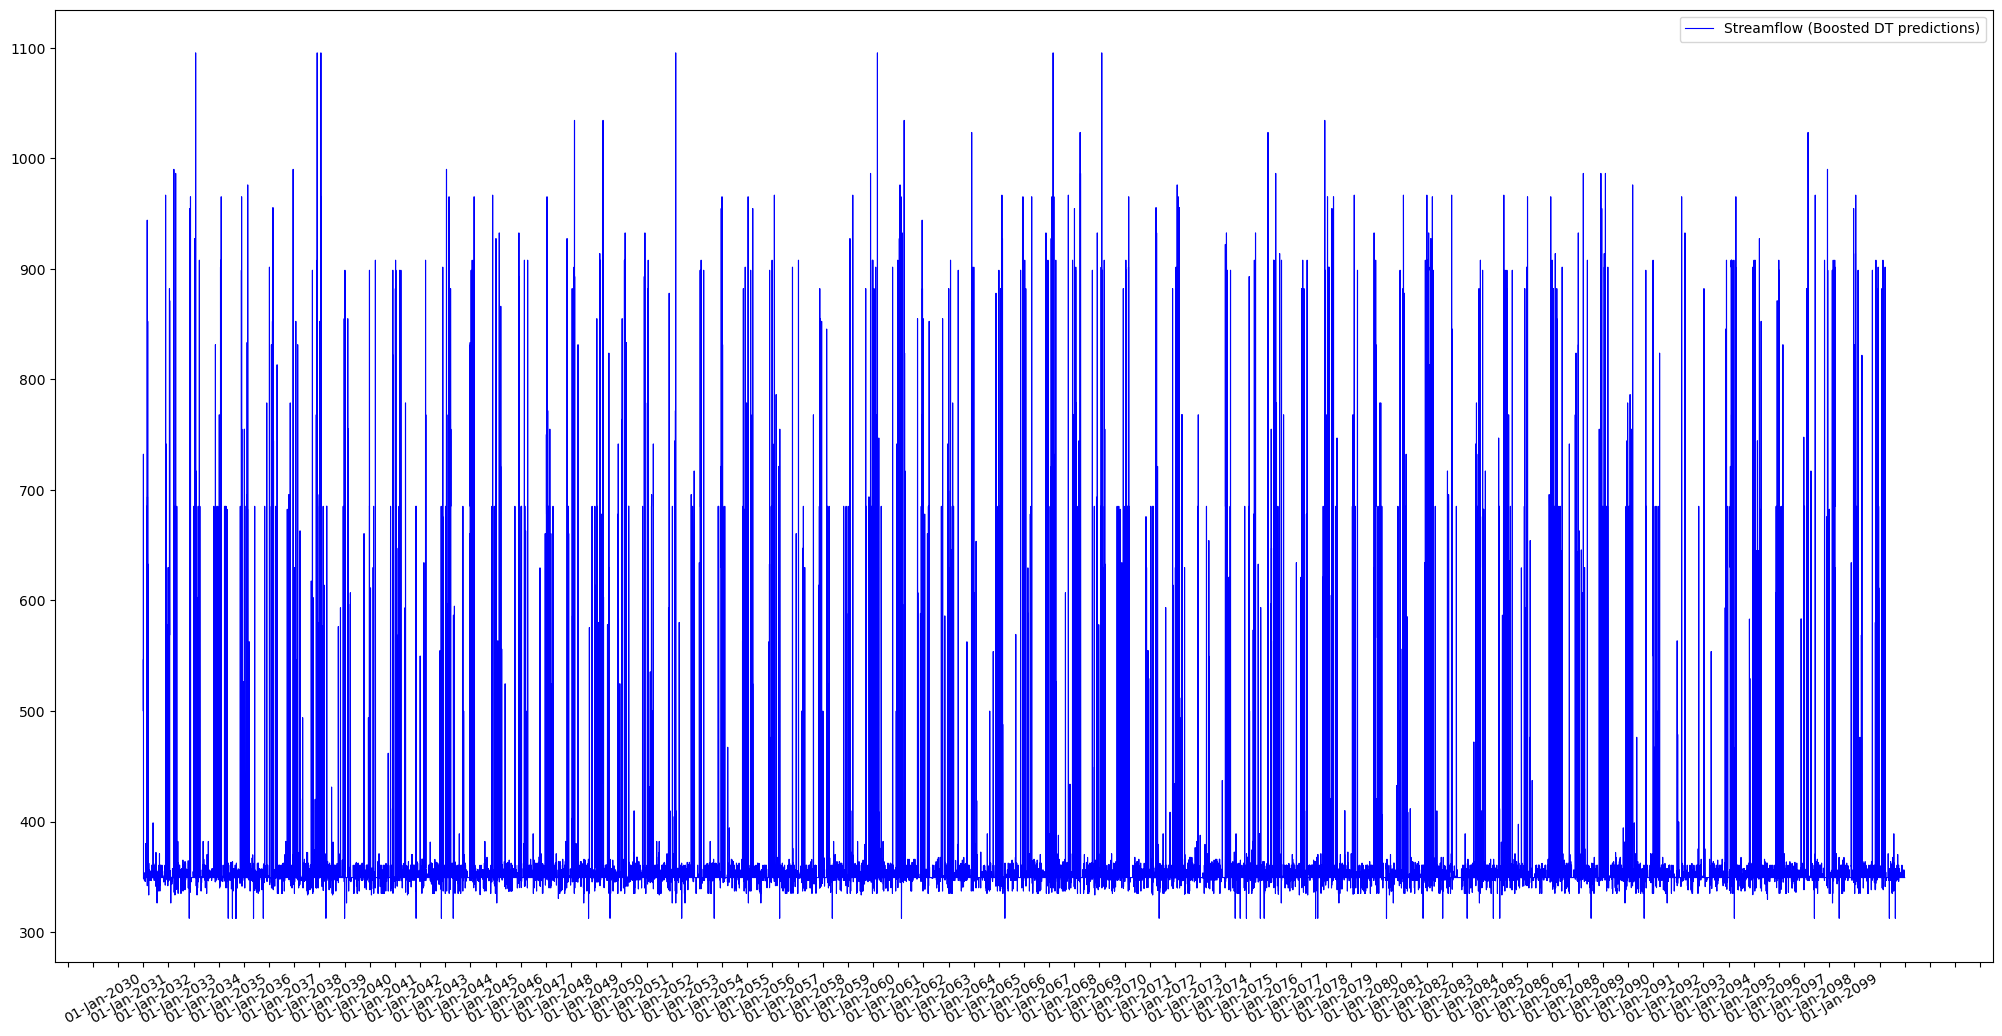

In [71]:
fig, ax = plt.subplots()
monthly_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(monthly_locator)
#ax.plot(df_3.index, df_3['prdaily'].values, color = 'red', linewidth = 0.8, label = 'prdaily')
#ax.plot(df_3.index, df_3['Stage Height (feet)'].values, color = 'green', linewidth = 0.8, label = 'Stage Height (feet)')
ax.plot(df_index.index, ypred_test, color = 'blue', linewidth = 0.8, label = 'Streamflow (Boosted DT predictions)')
#Then tick and format with matplotlib:

fig.autofmt_xdate()
fig.set_size_inches(25,14)
plt.legend()
plt.show()